# **EXPLORATORY DATA ANALYSIS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("cleaned_df.csv")

In [3]:
df.head()

,customer_id,age,gender,item,category,amount,location,size,color,season,rating,shipping_type,discount_used,total_orders,payment_method,order_frequency
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Express,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Express,Yes,2,Cash,Fortnightly
2,3,50,Male,Pants,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Free Shipping,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Next Day Air,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Free Shipping,Yes,31,PayPal,Annually


# **UNIVARIATE ANALYSIS**

<Axes: ylabel='Frequency'>

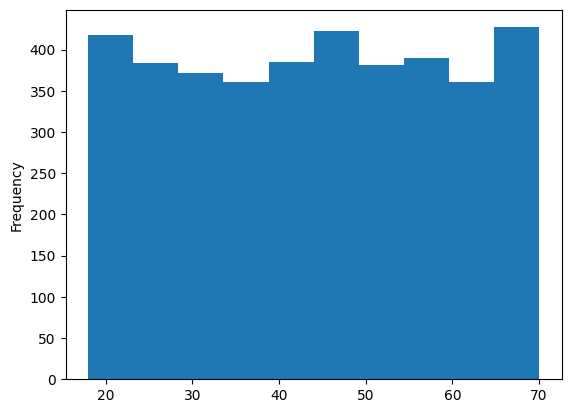

In [5]:
df['age'].plot(kind='hist')

<Axes: xlabel='gender'>

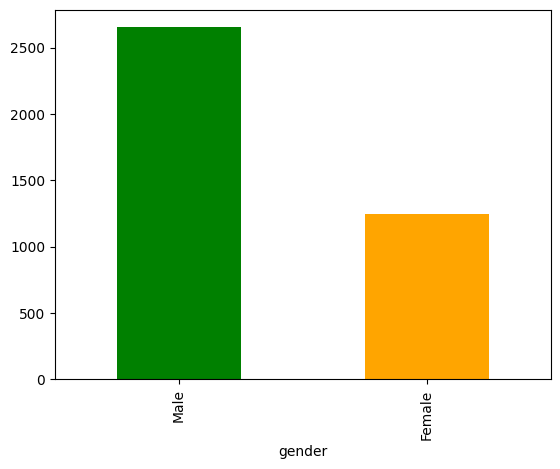

In [7]:
df['gender'].value_counts().plot(kind='bar', color=['green', 'orange'])

In [8]:
df['category'].nunique()

4

<Axes: xlabel='category'>

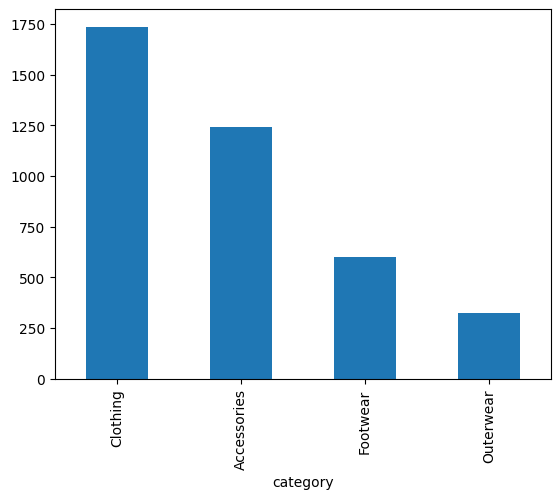

In [9]:
#Plot
df['category'].value_counts().plot(kind='bar')

<Axes: xlabel='rating'>

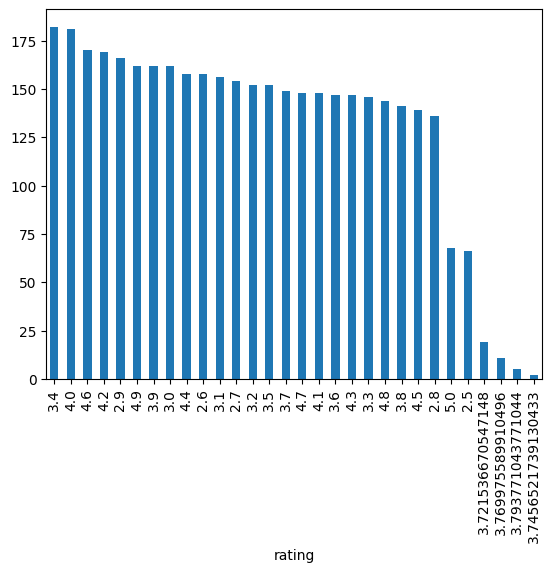

In [12]:
df['rating'].value_counts().plot(kind='bar')


<Axes: xlabel='payment_method'>

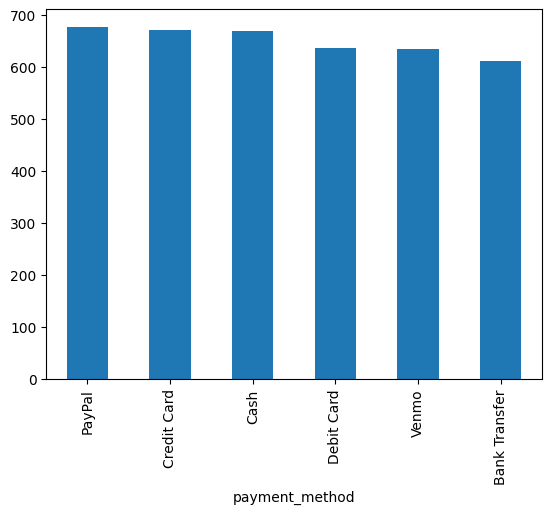

In [13]:
df['payment_method'].value_counts().plot(kind='bar')

<Axes: xlabel='shipping_type'>

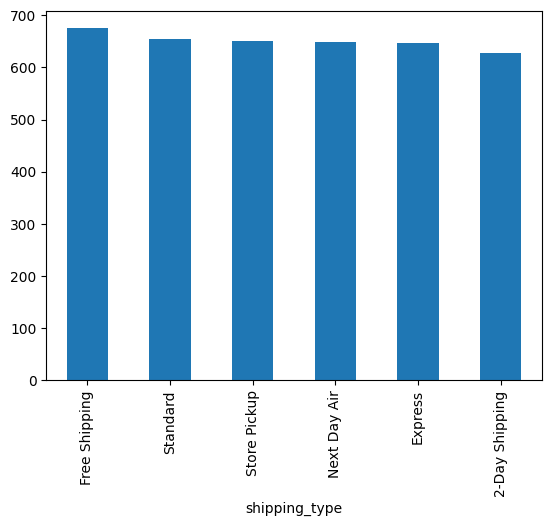

In [14]:
df['shipping_type'].value_counts().plot(kind='bar')

<Axes: xlabel='discount_used'>

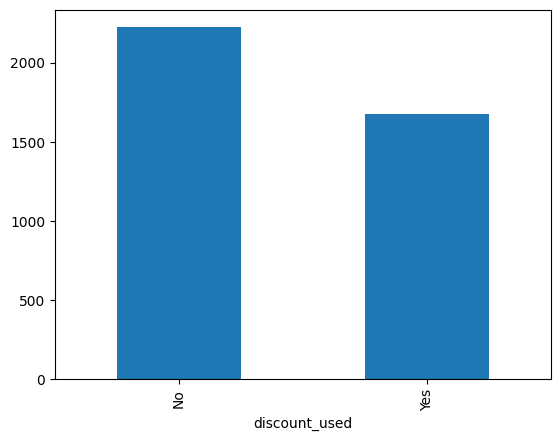

In [15]:
df['discount_used'].value_counts().plot(kind='bar')

# **BIVARIATE ANALYSIS**

In [28]:
df.columns

Index(['customer_id', 'age', 'gender', 'item', 'category', 'amount',
       'location', 'size', 'color', 'season', 'rating', 'shipping_type',
       'discount_used', 'total_orders', 'payment_method', 'order_frequency',
       'rating_bin', 'age_bin', 'order_bin'],
      dtype='object')

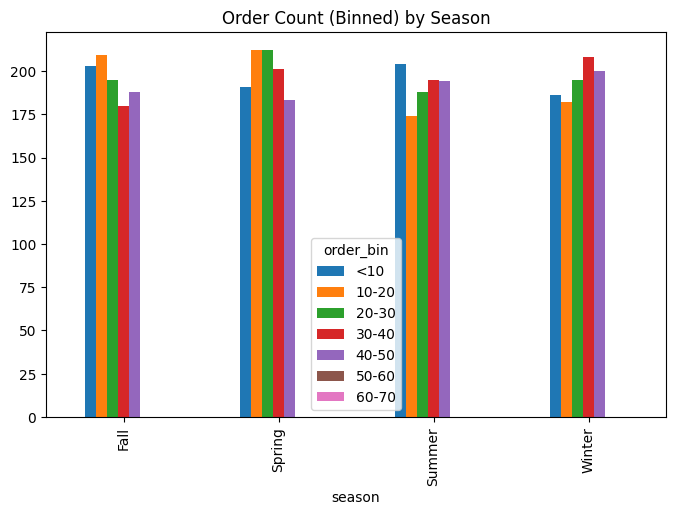

In [68]:
# orders per sessions
df['order_bin'] = pd.cut(
    df['total_orders'],
    bins=[0,10,20,30,40,55,60,70],
    labels=['<10','10-20','20-30','30-40','40-50','50-60','60-70']
)

df.groupby('season')['order_bin'] \
  .value_counts() \
  .unstack() \
  .plot(kind='bar', figsize=(8,5))

plt.title('Order Count (Binned) by Season')
plt.show()

# most orders in spring

/tmp/ipython-input-4252068685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='season', y='amount', palette='viridis')


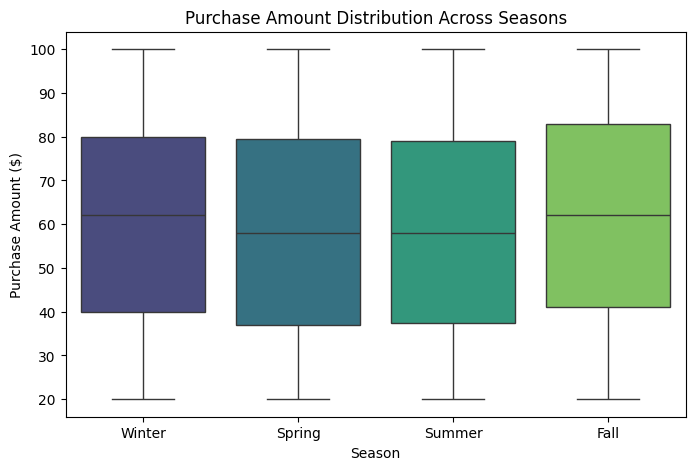

In [39]:
# purchase amount across seasons

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='season', y='amount', palette='viridis')
plt.title('Purchase Amount Distribution Across Seasons')
plt.xlabel('Season')
plt.ylabel('Purchase Amount ($)')
plt.show()

# fall season got costly orders

/tmp/ipython-input-3788169719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='shipping_type', y='rating', palette='plasma')


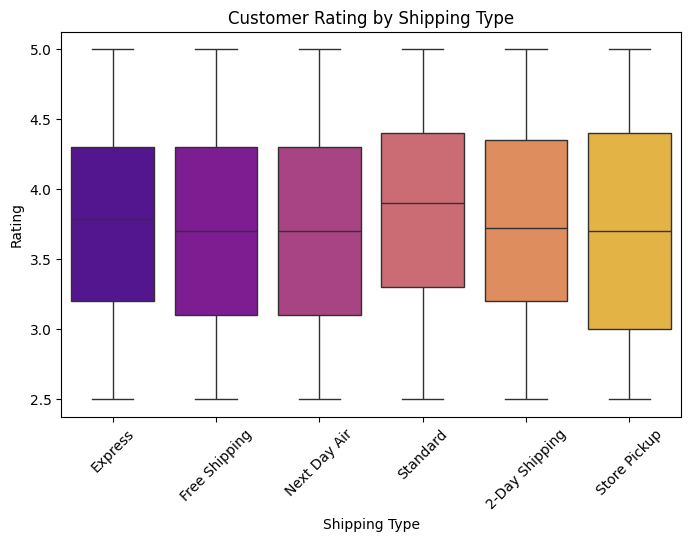

In [42]:
# customer rating by shipping type

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='shipping_type', y='rating', palette='plasma')
plt.title('Customer Rating by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2476836886.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['location'].isin(top_locs)], x='location', y='amount', palette='viridis', ci=None)
/tmp/ipython-input-2476836886.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['location'].isin(top_locs)], x='location', y='amount', palette='viridis', ci=None)


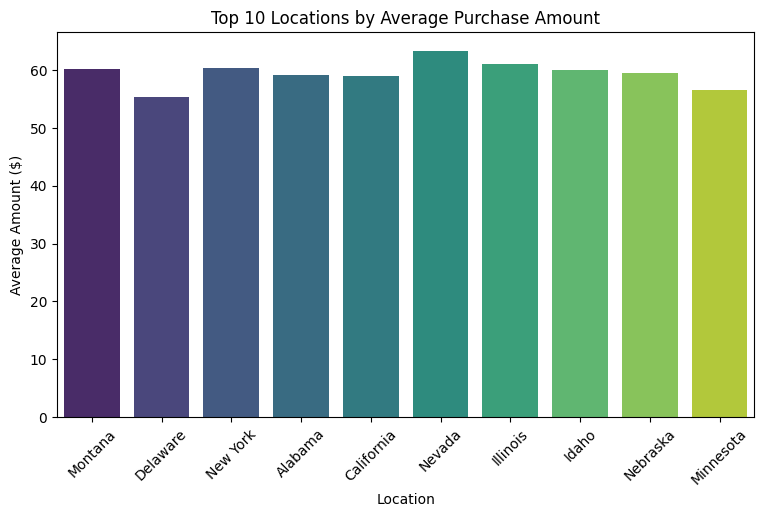

In [51]:
# graph between location and amount

top_locs = df['location'].value_counts().head(10).index
plt.figure(figsize=(9,5))
sns.barplot(data=df[df['location'].isin(top_locs)], x='location', y='amount', palette='viridis', ci=None)
plt.title('Top 10 Locations by Average Purchase Amount')
plt.xlabel('Location')
plt.ylabel('Average Amount ($)')
plt.xticks(rotation=45)
plt.show()

less orders from minnesota, delaware

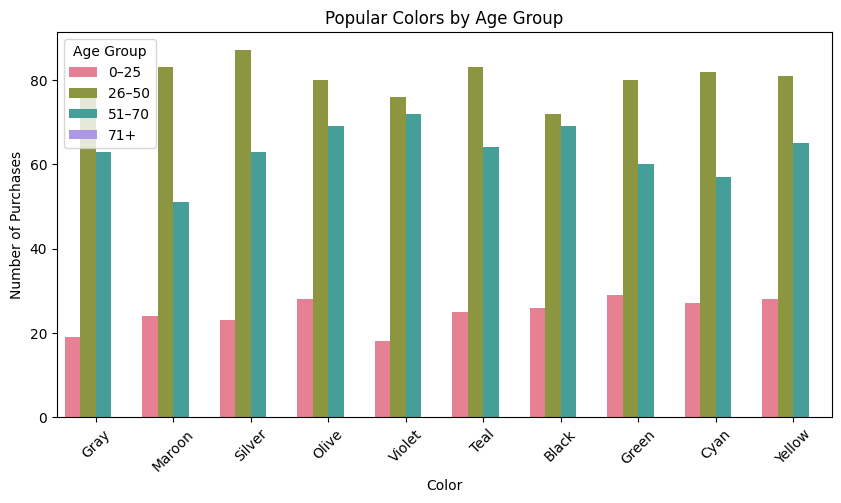

In [55]:
# 1️⃣ Create new age groups
df['age_group_extended'] = pd.cut(df['age'],
                                  bins=[0,25,50,70,120],
                                  labels=['0–25','26–50','51–70','71+'])

# 2️⃣ Pick top colors for a clean visual
top_colors = df['color'].value_counts().head(10).index

# 3️⃣ Plot distribution of favored colors by age group
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['color'].isin(top_colors)],
              x='color', hue='age_group_extended',
              palette='husl')

plt.title('Popular Colors by Age Group')
plt.xlabel('Color')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

Overview-
- most number of orders in spring season
- most number of costly orders are in fall season
- the rating of shipping methods store pickup, next air way is less on the      other hand standard shipping method rating is higher (unusual)
- minnesota and delaware state has less orders as compare to other states
- maroon violet and grey color clothes have less orders